# CSCI 4622 - Spring 2018 - Practicum 
***


This practicum is due on Moodle by **11:59pm on Thursday May 3rd**. 

**Here are the rules:** 

4. Your work must be done entirely on your own. You may **NOT** collaborate with classmates or anyone else.  
3. You may **NOT** post to message boards or other online resources asking for help. 
5. You may **NOT** use late days on the practicum nor can you drop your practicum grade. 
1. You may use your course notes, posted lecture slides, in-class notebooks, and homework solutions as resources. 
2. You may consult alternate sources like blog posts or technical papers, but you may **NOT** copy code from these sources. 
3. Any additional non-course sources that you use should be clearly cited (with links) in the **References** section at the bottom of this notebook. 
7. Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

Violation of the above rules will result in an **F** in the course and a trip to **Honor Council** 

***

**By writing your name below you agree to abide by the given rules:**

**Name**: Brennon Lee

**Kaggle Username**: BrennonLee34

***


**NOTES**: 

- You do not need to implement everything from scratch.  At this point you should be leveraging Sklearn as much as you can. 
- If you have a clarifying question, please post it as a **PRIVATE** message to me on Piazza. 
- Part of the goal of this assignment is to see if you can stand on your own.  Please do not ask me to help you debug code or check if your answers are correct. Most of the implementation details necessary to complete this practicum can be found in the Hands-On notebooks or the Sklearn documentation.  
- You'll notice that the point totals below do not add up to 100.  This is because 10 out of the 100 points will be attributed to **style**.  To earn full credit for style your analysis should be concise and well-organized, your code should be readable and well-commented, and you should use plots and graphics to support your conclusions whenever appropriate.  

In [1]:
import pickle, gzip 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split # To split data into TRAIN & VALID
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

### [35 points] Problem 1: Building Classifiers for Fashion MNIST 
***

The classic MNIST Handwritten Digit data set has been a staple in the machine learning literature since the beginning of time (i.e. the late 90's).  However, machine learning practitioners have grown tired of the rusty digits and have recently begun to create and explore new, more interesting data sets. Some popular alternatives to emerge recently are [EMNIST](https://www.kaggle.com/crawford/emnist), [Sign Language MNIST](https://www.kaggle.com/datamunge/sign-language-mnist), and [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). In this problem you will explore the latter. 

Fashion MNIST is comprised of $28 \times 28$ pixel gray-scale images of clothing, with classes corresponding to things like tops, trousers, coats, dresses, and various types of shoes.  The data set that we'll work with corresponds to a small subset of Fashion MNIST with 1500 examples from each of five distinct classes (tops, trousers, coats, sneakers, and ankle boots). 

Execute the following cell to load the data. 

In [2]:
f = gzip.open('data/fashion_mnist_subset.pklz', 'rb')
X_all, y_all = pickle.load(f)
X_train, X_valid, y_train, y_valid = train_test_split(X_all, y_all, test_size=0.33, random_state=42)
f.close()

In **Parts A-C** you will construct various tuned classifiers for making predictions on Fashion MNIST.  For each classifier you should: 
- Describe and motivate any transformations on the pixel data that you found helpful/necessary to make your model work well. 
- Describe and justify your process for determining optimal hyperparameters for each model. Support your decisions with validation studies and associated graphics.  Do **NOT** just report the hyperparameters that worked best.  
- Describe how you evaluated your models during your process (i.e. did you use a validation set, did you do cross-validation, etc). 
- Report the final optimal hyperparameters that you used as well as the accuracy of your final model. 

<Center><h3>Analysis of Given Data Set</h3></Center>

In [3]:
pixel_size = X_all[0].shape[0]
print('Based on the given data set, we can see that there are ' + str(pixel_size) + ' pixels in each image. \nWhich can be divided into images of size ' + str(np.sqrt(pixel_size)) + ' x ' + str(np.sqrt(pixel_size)))
print('Unigue labels on our true labels are the following set: ' + str(set(y_all)))
print('Where: \n 0 correlates to tops \n 1 correlates to trousers \n 4 correlates to shirts \n 7 correlates to sneakers \n 9 correlates to ankle boots\n')
print('Training set consists of ' + str(len(X_train)) + ' examples')
for k in [0,1,4,7,9]:
    print("In X_train, there are {:d} examples of {}".format(len(X_train[y_train==k]), k))


Based on the given data set, we can see that there are 784 pixels in each image. 
Which can be divided into images of size 28.0 x 28.0
Unigue labels on our true labels are the following set: {0, 1, 4, 7, 9}
Where: 
 0 correlates to tops 
 1 correlates to trousers 
 4 correlates to shirts 
 7 correlates to sneakers 
 9 correlates to ankle boots

Training set consists of 5025 examples
In X_train, there are 984 examples of 0
In X_train, there are 1012 examples of 1
In X_train, there are 1019 examples of 4
In X_train, there are 1001 examples of 7
In X_train, there are 1009 examples of 9


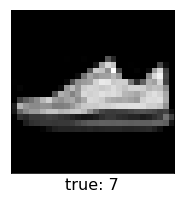

In [4]:
def view_item(x, label=None):
    fig = plt.figure(figsize=(3,3))
    plt.imshow(x.reshape(28,28), cmap='gray');
    plt.xticks([]); plt.yticks([]);
    if label: plt.xlabel("true: {}".format(label), fontsize=16)
                
training_index = 5
view_item(X_all[training_index], y_all[training_index])

**Part A**: Construct a K-Nearest Neighbors classifier to make predictions on the data. 

<Center><h3>KNeighbors Classifier</h3></Center>

For a KNN model, the two big parameters we need to tune is whether or not the distance should be weighted or unweighted and then the find the optimal amount of nearest neighbors that yield the highest accuracy. Below, shows an array of nearest neighbors from 1 to 14 where we create a KNN instance, train on our training data and then find the accuracy of this model against our validation set. Then we will graph both models (weighted and unweighted) with their associated accuracies against the number of neighbors we are analysing.

on k value: 1
on k value: 2
on k value: 3
on k value: 4
on k value: 5
on k value: 6
on k value: 7
on k value: 8
on k value: 9
on k value: 10
on k value: 11
on k value: 12
on k value: 13
on k value: 14


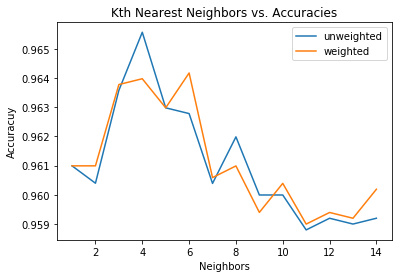

In [10]:
from sklearn.neighbors import KNeighborsClassifier
k_vals = range(1,15) # Array from 1 to 14 of the nearest neighbors

knn_accuracies = []
w_knn_accuracies = []
for k in k_vals:
    print('on k value: ' + str(k))
    knn = KNeighborsClassifier(n_neighbors=k)
    w_knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    
    unweighted_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    weighted_scores = cross_val_score(w_knn, X_train, y_train, cv=5, scoring='accuracy')
    
    knn_accuracies.append(unweighted_scores.mean())
    w_knn_accuracies.append(weighted_scores.mean())

plt.plot(k_vals, knn_accuracies, label='unweighted')
plt.plot(k_vals, w_knn_accuracies, label='weighted')
plt.xlabel("Neighbors")
plt.ylabel("Accuracuy")
plt.title("Kth Nearest Neighbors vs. Accuracies")
plt.legend()
plt.show()


In [26]:
print("The best accuracy of the unweighted KNN model is " + str(round(max(knn_accuracies) * 100, 2)) + '%')

The best accuracy of the unweighted KNN model is 96.56%


From the graph above, we can see that the optimal parameters that yield the highest accuracy on the data set is a Weighted KNN model looking at the 4 nearest neighbors.

In [8]:
from sklearn.metrics import confusion_matrix

best_knn = KNeighborsClassifier(4).fit(X_train, y_train)

yHat_valid = best_knn.predict(X_valid)
C = confusion_matrix(y_valid, yHat_valid)
print('Here is the confusion matrix for our best fit unweighted model which shows the that the most commonly confused item is sneakers with ankle boots.')
print(C)



Here is the confusion matrix for our best fit weighted model which shows the that the most commonly confused item is sneakers with ankle boots.
[[503   1  11   1   0]
 [ 12 472   4   0   0]
 [  7   0 472   2   0]
 [  0   0   0 468  31]
 [  0   0   0  21 470]]


**Part B**: Construct a Linear Support Vector Machine classifier to make predictions on the data. 

<Center><h3>Linear Support Vector Machine Classifier</h3></Center>

For a Linear Support Vector Machine classifier, there are two parameters to look at. The hyperparameter ($C$) that weights the slackness contribution to the primal objective function, and then the loss ($p$) which is the exponent on the slack variables in the sum. To do some parameter searching, we can use GridSearch to find the optimal parameters for this model. Below does just that but also loops over loss functions **Hinge** and **Squared Hinge** to see which performs better.

In [4]:
normalized_all = normalize(X_all)  # Normalize the data

In [29]:
from sklearn.svm import LinearSVC

c_range = np.logspace(-2,10,13)
param_grid = dict(C=c_range)

for loss_func in ["hinge", "squared_hinge"]:
    svc = LinearSVC(loss=loss_func)
    grid = GridSearchCV(svc, param_grid=param_grid, cv=5)
    grid.fit(normalized_all, y_all)
    
    print("\nbest parameters with loss=" + loss_func + " is : " + str(grid.best_params_))
    print("best accuracy with loss="+ loss_func + " is : "+ str(grid.best_score_))


best parameters with loss=hinge is : {'C': 10.0}
best accuracy with loss=hinge is : 0.9694666666666667

best parameters with loss=squared_hinge is : {'C': 10.0}
best accuracy with loss=squared_hinge is : 0.9678666666666667


Notice from the output above that the loss function had little to no effect on the outcome of the best parameters and best accuracy respectively. But we did find that our most optimal value for the $C$ parameter is the value $10$ with our best accuracy score of ~$96.79$%.

**Part C**: Construct a Feed-Forward Neural Network classifier to make predictions on the data. We recommend using Sklearn's [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) rather than the code you wrote in Homework 4. In our experiments we found training an MLPClassifier to take no more than a minute for reasonable choices of architectures. 

<Center><h3>Feed-Forwared Neural Network Classifier</h3></Center>

For Neural Network, the hyperparameters we are going to want to tune will be alpha (L2 penalty/ Regularization term), our hidden layer sizes $(i_{1}, i_{2},..., i_{n})$ where $i_{k}$ is the number of neurons and $n$ is number of hidden layers. Lastly, we can tune our activation function to see which performs the best.

On alpha: 1e-07
On alpha: 0.0034483724137931034
On alpha: 0.006896644827586207
On alpha: 0.010344917241379311
On alpha: 0.013793189655172414
On alpha: 0.017241462068965516
On alpha: 0.020689734482758623
On alpha: 0.024138006896551725
On alpha: 0.027586279310344828
On alpha: 0.03103455172413793
On alpha: 0.03448282413793104
On alpha: 0.03793109655172414
On alpha: 0.04137936896551725
On alpha: 0.04482764137931035
On alpha: 0.048275913793103455
On alpha: 0.051724186206896554
On alpha: 0.05517245862068966
On alpha: 0.058620731034482766
On alpha: 0.062069003448275865
On alpha: 0.06551727586206897
On alpha: 0.06896554827586207
On alpha: 0.07241382068965518
On alpha: 0.07586209310344828
On alpha: 0.07931036551724138
On alpha: 0.0827586379310345
On alpha: 0.0862069103448276
On alpha: 0.0896551827586207
On alpha: 0.0931034551724138
On alpha: 0.0965517275862069
On alpha: 0.1
Best alpha was 0.006896644827586207 with accuracy 0.9713131313131314


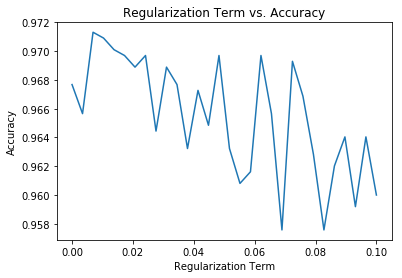

In [18]:
from sklearn.neural_network import MLPClassifier

alphas = np.linspace(1e-7, .1, 30)
alphas_acc = []

normed_train = normalize(X_train)
normed_valid = normalize(X_valid)

best_alpha = 0
best_alpha_acc = 0

for aa in alphas:
    print('On alpha:', aa)
    mlp = MLPClassifier(alpha=aa)
    mlp.fit(normed_train, y_train)
    score = mlp.score(normed_valid, y_valid)
    alphas_acc.append(score)
    if score > best_alpha_acc:
        best_alpha_acc = score
        best_alpha = aa
    
print('Best alpha was ' + str(best_alpha) + ' with accuracy ' + str(best_alpha_acc))
plt.plot(alphas, alphas_acc)
plt.xlabel("Regularization Term")
plt.ylabel("Accuracy")
plt.title("Regularization Term vs. Accuracy")
plt.show()

Taking our best alpha value of $0.00689$ from above, we can now try to tune for the best combination of architectures 

On architecture (10, 30, 20)
On architecture (10, 800, 10)
On architecture (1000,)
On architecture (200, 10, 10, 10, 300)
On architecture (100, 300, 300, 200)
On architecture (700,)


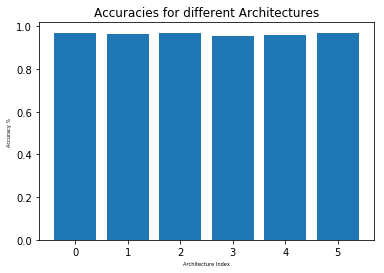

Best Accuracy was 0.9701010101010101
Best Architecture was (700,)


In [21]:
architectures = [(10,30,20), (10, 800, 10), (1000,), (200, 10, 10, 10, 300), (100, 300, 300, 200), (700,)]

arch_acc = []
best_arch = []
best_arch_acc = 0

for arch in architectures:
    print('On architecture ' + str(arch))
    mlp = MLPClassifier(hidden_layer_sizes=arch, alpha=best_alpha, random_state=0)
    mlp.fit(normed_train, y_train)
    acc = mlp.score(normed_valid, y_valid)
    arch_acc.append(acc)
    if acc >= best_arch_acc:
        best_arch_acc = acc
        best_arch.append(arch)
        

index = np.arange(len(architectures))
plt.bar(index, arch_acc)
plt.xlabel('Architecture Index', fontsize=5)
plt.ylabel('Accuracy %', fontsize=5)
plt.title('Accuracies for different Architectures')
plt.show()
    
print('Best Accuracy was ' + str(best_arch_acc))
print('Best Architecture was ' + str(best_arch[-1]))

Now that we have a good idea for the ranges that our best hyperparameters (alpha and hidden layers) live in, we can define a more specific set of ranges to iterate over and use GridSearchCV to find the most optimal parameters possible while also looking at the different activation functions.

In [15]:
alpha_range = np.linspace(0.0055,0.0075, 4)
hidden_layers_range = [(ll,) for ll in np.arange(600, 900, 100)]
act_func = ["logistic", "relu", "tanh"]

param_grid = dict(alpha=alpha_range, hidden_layer_sizes=hidden_layers_range, activation=act_func)

mlp = MLPClassifier()
grid = GridSearchCV(mlp, param_grid=param_grid, cv=3, verbose=10)
grid.fit(normalized_all, y_all)

print("\nbest parameters are: " + str(grid.best_params_))
print("best accuracy is : "+ str(grid.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] activation=logistic, alpha=0.0055, hidden_layer_sizes=(600,) ....
[CV]  activation=logistic, alpha=0.0055, hidden_layer_sizes=(600,), score=0.9664, total=  22.5s
[CV] activation=logistic, alpha=0.0055, hidden_layer_sizes=(600,) ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.6s remaining:    0.0s


[CV]  activation=logistic, alpha=0.0055, hidden_layer_sizes=(600,), score=0.968, total=  25.8s
[CV] activation=logistic, alpha=0.0055, hidden_layer_sizes=(600,) ....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   48.5s remaining:    0.0s


[CV]  activation=logistic, alpha=0.0055, hidden_layer_sizes=(600,), score=0.9632, total=  28.5s
[CV] activation=logistic, alpha=0.0055, hidden_layer_sizes=(700,) ....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV]  activation=logistic, alpha=0.0055, hidden_layer_sizes=(700,), score=0.9616, total=  18.7s
[CV] activation=logistic, alpha=0.0055, hidden_layer_sizes=(700,) ....


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


[CV]  activation=logistic, alpha=0.0055, hidden_layer_sizes=(700,), score=0.964, total=  20.6s
[CV] activation=logistic, alpha=0.0055, hidden_layer_sizes=(700,) ....


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.9min remaining:    0.0s


[CV]  activation=logistic, alpha=0.0055, hidden_layer_sizes=(700,), score=0.9644, total=  33.1s
[CV] activation=logistic, alpha=0.0055, hidden_layer_sizes=(800,) ....


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.5min remaining:    0.0s


[CV]  activation=logistic, alpha=0.0055, hidden_layer_sizes=(800,), score=0.964, total=  37.1s
[CV] activation=logistic, alpha=0.0055, hidden_layer_sizes=(800,) ....


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.1min remaining:    0.0s


[CV]  activation=logistic, alpha=0.0055, hidden_layer_sizes=(800,), score=0.9652, total=  33.4s
[CV] activation=logistic, alpha=0.0055, hidden_layer_sizes=(800,) ....


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.7min remaining:    0.0s


[CV]  activation=logistic, alpha=0.0055, hidden_layer_sizes=(800,), score=0.9624, total=  30.2s
[CV] activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(600,) 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.2min remaining:    0.0s


[CV]  activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(600,), score=0.9632, total=  20.9s
[CV] activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(600,) 
[CV]  activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(600,), score=0.9644, total=  21.7s
[CV] activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(600,) 
[CV]  activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(600,), score=0.9596, total=  20.5s
[CV] activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(700,) 
[CV]  activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(700,), score=0.9676, total=  32.7s
[CV] activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(700,) 
[CV]  activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(700,), score=0.9652, total=  28.6s
[CV] activation=logistic, alpha=0.006166666666666667, hidden_layer_sizes=(700,) 
[CV]  activation=logistic, alpha=0.0061666666

[CV]  activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(600,), score=0.9692, total=  15.1s
[CV] activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(600,) 
[CV]  activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(600,), score=0.96, total=  13.3s
[CV] activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(700,) 
[CV]  activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(700,), score=0.9728, total=  18.4s
[CV] activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(700,) 
[CV]  activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(700,), score=0.9696, total=  24.3s
[CV] activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(700,) 
[CV]  activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(700,), score=0.9612, total=  17.5s
[CV] activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(800,) 
[CV]  activation=relu, alpha=0.006833333333333333, hidden_layer_sizes=(800,), score=0.9

[CV]  activation=tanh, alpha=0.0075, hidden_layer_sizes=(700,), score=0.9688, total=  17.0s
[CV] activation=tanh, alpha=0.0075, hidden_layer_sizes=(700,) ........
[CV]  activation=tanh, alpha=0.0075, hidden_layer_sizes=(700,), score=0.9648, total=  14.0s
[CV] activation=tanh, alpha=0.0075, hidden_layer_sizes=(800,) ........
[CV]  activation=tanh, alpha=0.0075, hidden_layer_sizes=(800,), score=0.9652, total=  20.7s
[CV] activation=tanh, alpha=0.0075, hidden_layer_sizes=(800,) ........
[CV]  activation=tanh, alpha=0.0075, hidden_layer_sizes=(800,), score=0.9636, total=  19.6s
[CV] activation=tanh, alpha=0.0075, hidden_layer_sizes=(800,) ........
[CV]  activation=tanh, alpha=0.0075, hidden_layer_sizes=(800,), score=0.9584, total=   9.7s


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 39.4min finished



best parameters are: {'activation': 'relu', 'alpha': 0.006166666666666667, 'hidden_layer_sizes': (800,)}
best accuracy is : 0.972


After running GridSearch, we have found our optimal hyperparameters, **alpha=$0.00616$, Hidden_layer_sizes = $(800,)$, and activation=relu**. With a best accuracy of **97.2%**

**Part D**: Which of the three models above performed the best on the data set?  Were you surprised or not surprised by your results?  Discuss. 

**Part E**: For the best model you identified in **Part D**, perform a train-validation split and construct a confusion matrix based on predictions on the validation set.  Which classes tend to get confused with each other the most? Are there any classes for which your model performs exceptionally well?  Plot at least one misclassified example from each of the often-confused classes and suggests reasons why this behavior might occur.   

### [30 points] Problem 2: Predicting Authors of Presidential Election Tweets 
***

For the first time in history, the run-up to the 2016 presidential election saw candidates move a large portion of their campaigns from the traditional debating lectern to the Twitterverse. In this problem you will construct various classifiers to predict whether a tweet was sent by @HillaryClinton ($y=0$) or @realDonaldTrump ($y=1$). 

The data set contains $4000$ tweets that have been cleaned by converting all text to lowercase, removing punctuation, and removing hypertext links. In order to preserve hashtags we've replaced the typical # with the string `hashtag` (e.g. `#GiantMeteor` would be converted to `hashtaggiantmeteor`).  

Execute the following cell to load the data. 

In [11]:
f = gzip.open('data/clean_tweets.pklz','rb')
text_all, y_all = pickle.load(f)
text_train, text_valid, y_train, y_valid = train_test_split(text_all, y_all, test_size=0.33, random_state=42)
f.close()

**Part A**: Vectorize the text features using the Bag-of-Words text model **while removing stop words**.  Then answer the following questions: 

- How many distinct text features are there in the data after stop words are removed? 
- How many distinct **HashTags** are there in the data? 
- Which candidate uses HashTags the most frequently? 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer 

bagofwords = TfidfVectorizer(stop_words="english")           # initialize the vectorizer
Xbw_train = bagofwords.fit_transform(text_all)             # fit to training data and transform to matrix 

In [55]:
import re

def get_who_hashtags(text, true):
    counts = np.array([[0],[0]])
    for ii,sentence in enumerate(text):
        if "HASHTAG" in sentence:
            counts[true[ii]] += 1
    return counts

def get_hashtags(vocab, num_common=20):
    hashtag_count = 0
    for word in vocab:
        match = re.search("hashtag.*", word)     # regex match on hashtag followed by any other characters 
        if match:                                # cuz I forgot python does everything for u
            hashtag_count += 1
    return hashtag_count

hashtags = get_who_hashtags(text_all, y_all)

print("There are {:d} terms in the vocabulary".format(Xbw_train.shape[1]))
print("There are {:d} distinct hashtags in the data".format(get_hashtags(bagofwords.vocabulary_)))
print("Trump has used "+str(hashtags[1][0])+" hashtags compare to Hillary using "+str(hashtags[0][0])+" hashtags.")


There are 5981 terms in the vocabulary
There are 186 distinct hashtags in the data
Trump has used 550 hashtags compare to Hillary using 241 hashtags.


**Part B**: Construct a Logistic Regression classifier with L2 regularization to make predictions on the data. Exactly as in **Problem 1**, you should clearly detail your process for picking optimal hyperparameters and evaluating your model, and report the details of your best model along with final validation accuracy. 

Best Inverse regularization value is: 5.800000000000004 with accuracy 92.73%


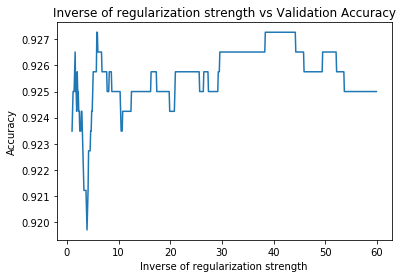

In [18]:
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression

# bagofwords = TfidfVectorizer(stop_words="english")
# logreg = LogisticRegression(C=1)

# bagofwords_steps = [
#     ("bagofwords", bagofwords),
#     ("logreg", logreg)
# ]
# bagofwords_pipe = Pipeline(bagofwords_steps)
# bagofwords_pipe.fit(text_train, y_train)

# train_acc = bagofwords_pipe.score(text_train, y_train)
# valid_acc = bagofwords_pipe.score(text_valid, y_valid)
# print("Accuracy on Training Set:   {:.3f}".format(train_acc))
# print("Accuracy on Validation Set: {:.3f}".format(valid_acc))

c_vals = np.arange(1, 60, .1)
best_c = 0
best_c_acc = 0.0
valid_acc = []

bagofwords = TfidfVectorizer(stop_words="english")
Xbw_train = bagofwords.fit_transform(text_train) 
vocab = bagofwords.vocabulary_

for c in c_vals:
    logreg = LogisticRegression(C=c, penalty = 'l2')

    bagofwords_steps = [
        ("bagofwords", bagofwords),
        ("logreg", logreg)
    ]
    bagofwords_pipe = Pipeline(bagofwords_steps)
    bagofwords_pipe.fit(text_train, y_train)
    acc = bagofwords_pipe.score(text_valid, y_valid)
    valid_acc.append(acc)
    if acc > best_c_acc:
        best_c = c
        best_c_acc = acc

print('Best Inverse regularization value is: ' + str(best_c) + ' with accuracy '+ str(round(best_c_acc * 100, 2)) + '%')  
plt.plot(c_vals, valid_acc)
plt.xlabel('Inverse of regularization strength')
plt.ylabel('Accuracy')
plt.title('Inverse of regularization strength vs Validation Accuracy')
plt.show()

In [19]:
bagofwords = TfidfVectorizer(stop_words="english")
logreg = LogisticRegression(C=5.8, penalty = 'l2')

bagofwords_steps = [
    ("bagofwords", bagofwords),
    ("logreg", logreg)
]
bagofwords_pipe = Pipeline(bagofwords_steps)
bagofwords_pipe.fit(text_train, y_train)


train_acc = bagofwords_pipe.score(text_train, y_train)
valid_acc = bagofwords_pipe.score(text_valid, y_valid)
print("Accuracy on Training Set:   {:.3f}".format(train_acc))
print("Accuracy on Validation Set: {:.3f}".format(valid_acc))

Accuracy on Training Set:   0.996
Accuracy on Validation Set: 0.927


**Part C**: Determine and report the 10 words that are the best predictors for @HillaryClinton and the 10 words that are the best predictors for @realDonaldTrump in your Logistic Regression model. In addition, you should briefly discuss how you found these best features mathematically. 

In [22]:
coefs = bagofwords_pipe.named_steps['logreg'].coef_[0]
top_clintons = np.argpartition(coefs, 10)[:10]
top_trumps = np.argpartition(coefs, -10)[-10:]
print('\nTop Words for @HillaryClinton')
print('-------------------------------')
for ii in top_clintons:
    word = list(vocab.keys())[list(vocab.values()).index(ii)] 
    print(word)
print('\nTop Words for @realDonaldTrump')
print('-------------------------------')
for ii in top_trumps:
    word = list(vocab.keys())[list(vocab.values()).index(ii)] 
    print(word)


Top Words for @HillaryClinton
-------------------------------
potus
rt
joebiden
trump
timkaine
hillary
trumps
donald
hillarys
hashtagdemsinphilly

Top Words for @realDonaldTrump
-------------------------------
thank
hashtagtrump2016
clinton
cnn
realdonaldtrump
media
crooked
great
hashtagamericafirst
hashtagmakeamericagreatagain


**Part D**: Construct a Naive Bayes classifier to make predictions on the data. Again, you should clearly detail your process for picking optimal hyperparameters and evaluating your model, and report the details of your best model along with final validation accuracy. **Hint**: Since text features are discrete, you'll want to use Sklearn's [MultinomialNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) classifier. 

**Part E**: Determine and report the 10 words that are the best predictors for @HillaryClinton and the 10 words that are the best predictors for @realDonaldTrump in your Naive Bayes model. In addition, you should briefly discuss how you found these best features mathematically. 

**Part F**: Which of the two models above performed the best on the data set?  Were you surprised or not surprised by your results?  Discuss. 

### [25 points] Problem 3: Feature Engineering and Presidential Tweets 
***

In this problem you will again work with the Twitter election data from **Problem 2**, but this time in its unadulterated raw form. Unlike in **Problem 2**, you will only be allowed to use Logistic Regression as your classifier.  Instead of using a fancier model, you will attempt to improve performance by crafting better features.  One way you might do this is to explore text models that are more sophisticated that simple Bag-of-Words. Alternatively, you might explore the training data and identify characteristics of tweets by a particular author that you can then turn into a feature. 

The class `TweetFeaturizer` shown below is already fully functional.  Your goal in this problem is to make it better.  In it's current state, the class reads in the training and test data, fits a Logistic Regression model using Bag-of-Words, makes predictions on the test set, and then dumps the predictions to a csv file that can be uploaded to Kaggle. You are free to modify this class is any way that you see fit, but we've given you some helpful functionality that will prove sufficient for most of you.  The `add_text_features` method currently loops over each tweet in the data set, copies it to a new array, and then passes that array into the text vectorizer.  One way to create new features is to append distinct word-indicators onto the string representing the tweet.  These will then be turned into features by the vectorizer. 

As an example (that is intentionally silly and probably unhelpful): Suppose you think a potentially helpful feature is whether or not the tweet contains more than 10 instances of the letter `z`.  In `add_text_features` you could count the number of `z`'s in a tweet and if there are more than 10, you could append the word `MoreThanTenZs` to the tweet.  Then, when the tweet is passed into the vectorizer, this will turn into a numerical feature.  

In addition to competing against yourself to craft the best features that you can, you'll also compete against your classmates in a Kaggle competition.  The competition page can be found here: 

https://www.kaggle.com/c/4622-election-tweet-authorship

A private invite link will be available on Piazza which will get you into the competition. Note that the test data has been partitioned into a public leaderboard set and a private leaderboard set.  While the competition is open, submitting to Kaggle will tell you your score on the public leaderboard.  Your scores on the private leaderboard will become available at the end of the competition.   The top **THREE** students on the **Private** leaderboard at the end of the competition will earn 10 extra credit points on the Practicum. Note that to prevent the machine learning-equivalent of button mashing, we've limited you to **10** submissions per day.  You should be evaluating your features locally with cross-validation and then submitting to Kaggle when you think you have something that works.  

**Part A**: **Feature Engineering**:  What you need to do: 

- Explore and experiment with the data to try to find good features 
- Implement these features in the `TweetFeaturizer` class  
- Implement some evaluation methods to see how well your features improve your model (*cough* cross-validation *cough*) 
- Make submissions to the Kaggle competition and see how you compared to your classmates 

**Part B**: **Motivation and Analysis**: What you need to do: 

Convince me that:

- Your new features work
- You understand what the new features are doing
- You had a clear methodology for incorporating the new features


In [14]:
class TweetFeaturizer:
    def __init__(self):
        
        from sklearn.feature_extraction.text import TfidfVectorizer 
#         import nltk
#         nltk.download()

        self.vectorizer = TfidfVectorizer(
            stop_words="english",
            analyzer = 'word',
            lowercase=False,
            sublinear_tf=True,
            token_pattern='[a-z0-9_]*\s*[\w]*',
            strip_accents='unicode',
#             tokenizer=nltk.word_tokenize,
            binary=True
        )

        
    def add_text_features(self, examples):
        """
        Method for looping over original text and adding new text 
        features. 
        :param examples: the list of raw tweets 
        """
        
        new_examples = [] 
        for ex in examples:
            if ('#' in ex):
                ex = ex + 'HASHTAG'
            if ('!' in ex):
                ex = ex + 'EXCLAMATION'
            if ('https' in ex):
                ex = ex + 'HTTPS'
            # here is where you might try to add new features 
            # currently this does nothing.  
            new_examples.append(ex)
            
        return new_examples

    def build_train_features(self, examples):
        """
        Method to take in training text features and do further feature engineering 
        Most of the work in this homework will go here, or in similar functions  
        :param examples: the list of raw tweets 
        """
        
        new_examples = self.add_text_features(examples)
        return self.vectorizer.fit_transform(new_examples)

    def get_test_features(self, examples):
        """
        Method to take in test text features and transform the same way as train features 
        :param examples: the list of raw tweets
        """
        new_examples = self.add_text_features(examples)
        return self.vectorizer.transform(new_examples)

    def show_top10(self):
        """
        prints the top 10 features for the positive class and the 
        top 10 features for the negative class. 
        """
        feature_names = np.asarray(self.vectorizer.get_feature_names())
        top10 = np.argsort(self.logreg.coef_[0])[-10:]
        bottom10 = np.argsort(self.logreg.coef_[0])[:10]
        print("DT: %s" % " ".join(feature_names[top10]))
        print("HC: %s" % " ".join(feature_names[bottom10]))
                
    def train_model(self, random_state=1234):
        """
        Method to read in training data from file, and 
        train Logistic Regression classifier. 
        
        :param random_state: seed for random number generator 
        """
        
        from sklearn.linear_model import LogisticRegression
        
        # load data 
        f = gzip.open('data/raw_tweets_train.pklz','rb')
        text_train, y_train = pickle.load(f)
        f.close()
        
        # get training features and labels 
        self.X_train = self.build_train_features(text_train)
        self.y_train = y_train
        
        # create range of C values to hand off to GridSearch to find the best hyperparam
        c_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        param_grid = {'C': c_vals }
        
        logreg = LogisticRegression(penalty='l2', random_state=random_state)
        grid = GridSearchCV(logreg, param_grid=param_grid, cv=5, n_jobs=-1)
        

        grid.fit(self.X_train, self.y_train)
        
        best_c_param = grid.best_params_['C']
        print('Accuracy: ' + str(grid.best_score_))
        
        
        # train logistic regression model.  !!MUST USE LogisticRegression!! #cross validation?
        self.logreg = LogisticRegression(random_state=random_state, C=best_c_param)
        self.logreg.fit(self.X_train, self.y_train)
        
    def model_predict(self):
        """
        Method to read in test data from file, make predictions
        using trained model, and dump results to file 
        """
        
        # read in test data 
        f = gzip.open('data/raw_tweets_test.pklz','rb')
        text_valid = pickle.load(f)
        f.close()
        
        # featurize test data 
        self.X_test = self.get_test_features(text_valid)
        
        # make predictions on test data 
        pred = self.logreg.predict(self.X_test)
        
        # dump predictions to file for submission to Kaggle  
        pd.DataFrame({"realDonaldTrump": np.array(pred, dtype=bool)}).to_csv("prediction.csv", index=True, index_label="Id")
        

# Instantiate the class 
feat = TweetFeaturizer()

# Train your Logistic Regression classifier 
feat.train_model(random_state=1234)

# Show the top 10 features for each class 
feat.show_top10()

# Make prediction on test data and produce Kaggle submission file 
feat.model_predict()

Accuracy: 0.94425
DT:  will AmericaFirst  Clinton CrookedHillary Trump2016  Crooked MakeAmericaGreatAgain realDonaldTrump Thank EXCLAMATION
HC: RT Hillary POTUS Trump H  https JoeBiden BillClinton  Trump  president


### References
***

